In [14]:
import pandas as pd

df = pd.read_csv('/content/seoul_temp (1).csv')
df['년'] = df['년'].str[3:]
df

년     지점  평균기온  최저기온  최고기온
0    1907  108.0   NaN   NaN   NaN
1    1908  108.0  10.4   5.8  15.7
2    1909  108.0  10.6   5.8  16.0
3    1910  108.0  10.3   5.7  15.9
4    1911  108.0  10.6   6.0  15.9
..    ...    ...   ...   ...   ...
112  2019  108.0  13.5   9.3  18.5
113  2020  108.0  13.2   9.4  17.9
114  2021  108.0  13.7   9.6  18.5
115  2022  108.0  13.2   9.2  18.0
116          NaN   NaN   NaN   NaN

[117 rows x 5 columns]

결측치 처리하기(null값 처리)

In [15]:
# df.isnull()  # 빈값에 true 출력
df.isnull().sum()

년       0
지점      1
평균기온    6
최저기온    6
최고기온    6
dtype: int64

In [16]:
df.dropna(subset=['지점'], inplace=True)  # inplace = True를 하지않으면 DB에 반영되지 않는 것 주의
df.isnull().sum()

년       0
지점      0
평균기온    5
최저기온    5
최고기온    5
dtype: int64

In [23]:
df.fillna(df.mean(), inplace=True)
# df.mean()
df.isnull().sum()

년       0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [37]:
df[(df['년'] > '1988') & (df['평균기온'] > 13)]
# df[df['평균기온'] >= 13]

년     지점  평균기온  최저기온  최고기온
87   1994  108.0  13.5   9.5  18.3
91   1998  108.0  13.8   9.8  18.4
92   1999  108.0  13.2   9.0  17.8
97   2004  108.0  13.3   9.5  17.7
100  2007  108.0  13.3   9.7  17.5
107  2014  108.0  13.4   9.3  18.3
108  2015  108.0  13.6   9.3  18.7
109  2016  108.0  13.6   9.4  18.5
112  2019  108.0  13.5   9.3  18.5
113  2020  108.0  13.2   9.4  17.9
114  2021  108.0  13.7   9.6  18.5
115  2022  108.0  13.2   9.2  18.0

In [42]:
df.rename(columns={'년':'연도'}, inplace = True)
df

연도     지점       평균기온      최저기온       최고기온
0    1907  108.0  11.736937  7.443243  16.734234
1    1908  108.0  10.400000  5.800000  15.700000
2    1909  108.0  10.600000  5.800000  16.000000
3    1910  108.0  10.300000  5.700000  15.900000
4    1911  108.0  10.600000  6.000000  15.900000
..    ...    ...        ...       ...        ...
111  2018  108.0  12.900000  8.800000  17.900000
112  2019  108.0  13.500000  9.300000  18.500000
113  2020  108.0  13.200000  9.400000  17.900000
114  2021  108.0  13.700000  9.600000  18.500000
115  2022  108.0  13.200000  9.200000  18.000000

[116 rows x 5 columns]

In [46]:
# df.nlargest(5,'평균기온')

df.nsmallest(5, '평균기온')

연도     지점  평균기온  최저기온  최고기온
40  1947  108.0   9.6   5.0  14.8
10  1917  108.0   9.8   4.8  15.5
29  1936  108.0   9.8   5.3  15.1
6   1913  108.0  10.0   4.9  15.6
5   1912  108.0  10.1   5.1  15.6

In [57]:
df[(df['평균기온'] > 15) & (df['최고기온'] >= 16.5) & (df['연도'] >= '1990') & (df['연도'] <= '2010')]

Empty DataFrame
Columns: [연도, 지점, 평균기온, 최저기온, 최고기온]
Index: []

In [61]:
df.nlargest(1,'평균기온')

연도     지점  평균기온  최저기온  최고기온
91  1998  108.0  13.8   9.8  18.4

In [62]:
df.nsmallest(1,'평균기온')

연도     지점  평균기온  최저기온  최고기온
40  1947  108.0   9.6   5.0  14.8

In [63]:
df.nlargest(1,'최고기온')

연도     지점  평균기온  최저기온  최고기온
108  2015  108.0  13.6   9.3  18.7

In [64]:
df.nsmallest(1,'최저기온')

연도     지점  평균기온  최저기온  최고기온
10  1917  108.0   9.8   4.8  15.5

In [69]:
df[(df['연도'] == '1974')]

연도     지점  평균기온  최저기온  최고기온
67  1974  108.0  11.1   7.2  15.9

In [70]:
df[(df['연도'] == '1975')]

연도     지점  평균기온  최저기온  최고기온
68  1975  108.0  12.5   8.6  17.4

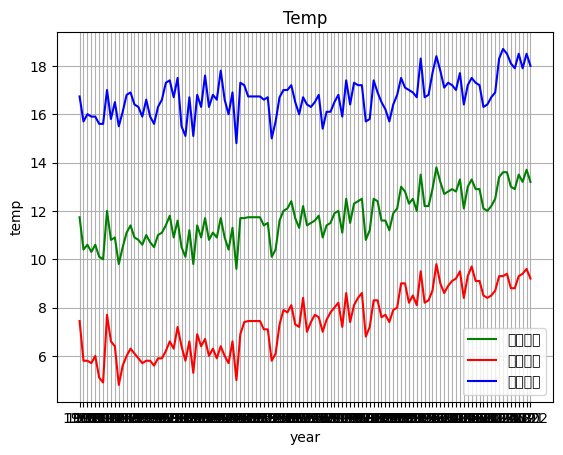

In [84]:
import matplotlib.pyplot as plt

x = df['연도']
y = df['평균기온']
x_max = df['최저기온']
y_max = df['최고기온']
plt.xlabel('year')
plt.ylabel('temp')
plt.plot(x,y,label='평균기온',color = 'green')
plt.plot(x,x_max,label='최고기온',color = 'red')
plt.plot(x,y_max,label='최저기온',color = 'blue')
plt.legend()
plt.grid()
plt.title('Temp')
plt.show()